# Aritificial intelligence assignment 2024

In [28]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.16.1


In [3]:
#plotData, plotInfo = tfds.as_numpy(tfds.load('emnist/letters', split='train', shuffle_files=True, with_info=True, batch_size=-1, as_supervised=True))

ds = tfds.as_numpy(tfds.load(
    'emnist/letters',
    split=['train', 'test'],
    shuffle_files=True,
    download=True,
    batch_size=-1,
    as_supervised=True,
))

(x_train, y_train), (x_test, y_test) = ds

In [4]:
# Toon de data
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (88800, 28, 28, 1)
Test data shape: (14800, 28, 28, 1)


In [5]:
# Normalize the pixel values to be between 0 and 1
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [7]:
model = Sequential()

#Maak de 28x28 array plat tot een 1 dimentionale array of een lijst
model.add(Flatten(input_shape=(28, 28)))

model.add(Dense(128, activation='relu'))
model.add(Dense(27, activation='softmax'))

#Compile the current model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

C:\Users\thimo\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Train het model met validatie
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6049 - loss: 1.4036 - val_accuracy: 0.7945 - val_loss: 0.6893
Epoch 2/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8133 - loss: 0.6172 - val_accuracy: 0.8289 - val_loss: 0.5527
Epoch 3/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8517 - loss: 0.4839 - val_accuracy: 0.8518 - val_loss: 0.4816
Epoch 4/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8715 - loss: 0.4202 - val_accuracy: 0.8600 - val_loss: 0.4508
Epoch 5/5
2498/2498 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8871 - loss: 0.3661 - val_accuracy: 0.8645 - val_loss: 0.4386


In [9]:
# Evalueer het model op de testset
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test nauwkeurigheid: {test_accuracy:.4f}")

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8517 - loss: 0.4733
Test nauwkeurigheid: 0.8506


In [10]:
# Modelgrootte berekenen
model_size = model.count_params()
model_memory = model_size * 4 / (1024 ** 2)  # 4 bytes per 32-bit float
print(f"Modelgrootte: {model_memory:.2f} MB")

Modelgrootte: 0.40 MB


In [11]:
from sklearn.metrics import confusion_matrix
import numpy as np

In [12]:
# Maak voorspellingen op de testset
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

463/463 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [13]:
# Bereken de verwarringsmatrix
cm = confusion_matrix(y_test, y_pred_classes)
print("Verwarringsmatrix:")
print(cm)

Verwarringsmatrix:
[[663   1   1   8   5   6  14  20   0   1   2   0   5  12  12   3  30   1
    1   1   4   0   1   4   0   5]
 [  6 712   1  11   5   0  16  23   2   3   0   4   0   1   5   1   2   1
    3   0   0   0   0   0   0   4]
 [  6   1 700   3  39   1  13   0   4   0   1   7   0   1   7   1   1   6
    1   5   1   0   1   0   0   1]
 [  6  12   1 692   0   1   3   3   1   7   2   1   0   7  38   7   4   2
    0   2   6   0   0   2   2   1]
 [ 14   4  22   0 717   4   4   0   0   0   1   4   1   0   6   2   3   9
    1   6   0   0   0   0   0   2]
 [  0   3   1   2   2 703   2   0   7   1   2   1   0   3   0  33   4  11
    4  20   0   0   0   0   1   0]
 [ 17  16   6   2   3   3 588   2   0  14   1   0   0   3   1   2 111   1
   20   2   1   0   1   0   6   0]
 [  3  10   0   6   0   3   1 711   4   2   7  10   9  17   0   0   0   1
    0   3   8   0   3   2   0   0]
 [  2   1   1   0   1   3   1   0 681  20   0  70   0   0   0   0   0   3
    3   5   1   0   1   2   1   4]


# With custom data set

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This letter should be a: 14


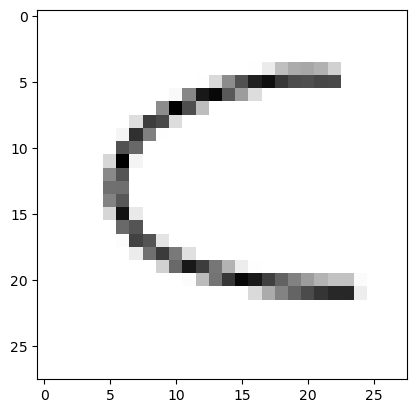

In [46]:
img_number = 1
# while os.path.isfile(f"dataset/A/img00{img_number}.png"):
#    try:
#        img = cv2.imread(f"dataset/A/img00{img_number}.png")[:,:,0]
#        img = np.invert(np.array([img]))
#        prediction = model.predict(img)
#        print(f"This letter should be a: {np.argmax(prediction)}")
#     except:
#         print("Error!")
#     finally:
#         img_number += 1
img = cv2.imread(f"dataset/C/img00{img_number}.png")[:,:,0]
img = np.invert(np.array([img]))
prediction = model.predict(img)
print(f"This letter should be a: {np.argmax(prediction)}")
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show()